## 1. Importing Essential Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 2. Data Cleaninig

In [27]:
dataset_path = 'SVR.csv'
df = pd.read_csv(dataset_path)
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")
#----------------------------------------

df.dropna()
df.dropna(axis=1)
#df["YearsExperience"].fillna(df["YearsExperience"].mean(),inplace=True)

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 x    0
y    0
dtype: int64


## 3.Variables Encoding

In [28]:
#one hot encode
df = pd.get_dummies(df, drop_first=True)
#--------------------------------------------------
# move y column to last coloumn
column_to_move = df.pop("y")
df.insert(len(df.columns), "y", column_to_move)
df

,x,y
0,168.181818,160.840244
1,187.878788,159.413657
2,207.575758,157.136809
3,227.272727,159.357847
4,246.969697,157.542862
...,...,...
89,1921.212121,172.285091
90,1940.909091,176.001331
91,1960.606061,176.128171
92,1980.303030,175.813257


## 4. Spliting data Sets

In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

## 5.Feature Scaling

In [30]:

#from sklearn.preprocessing import StandardScaler
#ss= StandardScaler()

#X_train = ss.fit_transform(X_train)
#X_test= ss.fit_transform(X_test)




## 6 Feature Selection

In [31]:

correalation_matrix=df.corr()
correalation_with_charge=correalation_matrix["y"].sort_values(ascending=False)
correalation_with_charge

y    1.000000
x    0.950549
Name: y, dtype: float64

## 7.Training the simple Linear Regression


In [32]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, y_train)

SVR()

## 8. Making Predictions on the Test Data


In [33]:
y_predictions = regressor.predict(X_test)

## 9. Evaluating Model Performance


In [34]:
r2 = r2_score(y_test, y_predictions)

print(f"R-squared Value: {r2}")

R-squared Value: 0.8664242653738368


## 10. Visualization of Regression Results


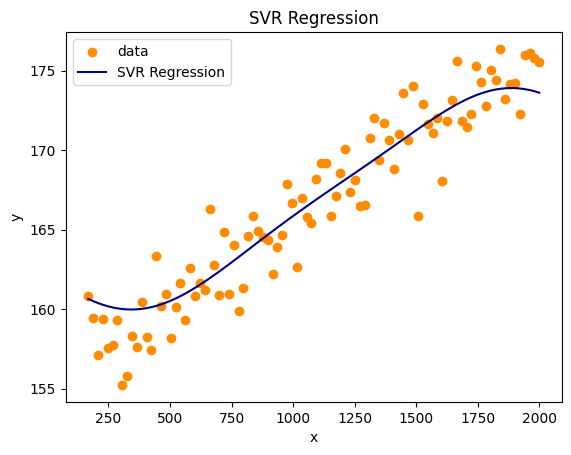

In [37]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X,regressor.predict(X),color='navy', label='SVR Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVR Regression')
plt.legend()
plt.show()